In [1]:
!pip install -q numpy pandas matplotlib statsmodels scipy

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
import math

In [196]:
SAMPLE_SIZE = 10000
SEED = 500
INPUT_MUS = [1.0, 50.0, 100.0]
INPUT_SIGMAS = [1.0, 5.0, 10.0]
NOISE_MUS = [0.0, 0.0]
NOISE_SIGMAS = [5.0, 10.0]

In [197]:
def plot_hists(inputs, suptitle=None):
    n_of_inputs = len(inputs)
    fig, axes = plt.subplots(1,n_of_inputs, figsize=(12,5))

    for input, ax in zip(inputs, axes):
        ax.hist(input, bins='auto', density=True)
        ax.axvline(input.mean(), color='k', linestyle='dashed', linewidth=1)
        ax.set_xlim(-10,150)
    
    fig.suptitle(suptitle) 
    plt.tight_layout()
    plt.show()

In [198]:
def plot_qq(datas, expected_params, suptitle=None):
    fig, axes = plt.subplots(1,len(datas), figsize=(12,5))

    for data, (expected_mu, expected_sigma), ax in zip(datas, expected_params, axes):
        sm.qqplot(data,  scipy.stats.norm, loc=expected_mu, scale=expected_sigma, ax=ax,line="45")
        #data /= np.std(data)
        #pg.qqplot(data, dist='norm', ax=ax, sparams=(0, 10))

    fig.suptitle(suptitle) 
    plt.tight_layout()
    plt.show()

In [199]:
def generate_inputs(mus=INPUT_MUS, sigmas=INPUT_SIGMAS):
    np.random.seed(SEED)
    gaussians = []
    for mu, sigma in zip(mus, sigmas):
        gaussians.append(np.random.normal(mu, sigma, size=SAMPLE_SIZE))

    return gaussians

inputs = generate_inputs()

In [200]:
def model(inputs, mus=NOISE_MUS, sigmas=NOISE_SIGMAS):
    np.random.seed(SEED+1)
    outputs = [[] for _ in range(2)]
    gauss_noise0 = np.random.normal(mus[0], sigmas[0], size=SAMPLE_SIZE)
    gauss_noise1 = np.random.normal(mus[1], sigmas[1], size=SAMPLE_SIZE)
    outputs[0] = inputs[0] + inputs[1] + gauss_noise0
    outputs[1] = inputs[2] + gauss_noise1
    return outputs

In [201]:
outputs = model(inputs)

In [202]:
expected_output_mus = np.zeros(2)
expected_output_sigmas = np.zeros(2)

expected_output_mus[0] = INPUT_MUS[0] + INPUT_MUS[1] + NOISE_MUS[0]
expected_output_mus[1] = INPUT_MUS[2] + NOISE_MUS[1]

expected_output_sigmas[0] = math.sqrt(math.pow(INPUT_SIGMAS[0],2.0) + math.pow(INPUT_SIGMAS[1],2.0) + math.pow(NOISE_SIGMAS[0],2.0))
expected_output_sigmas[1] = math.sqrt(math.pow(INPUT_SIGMAS[2],2.0) + math.pow(NOISE_SIGMAS[1],2.0))

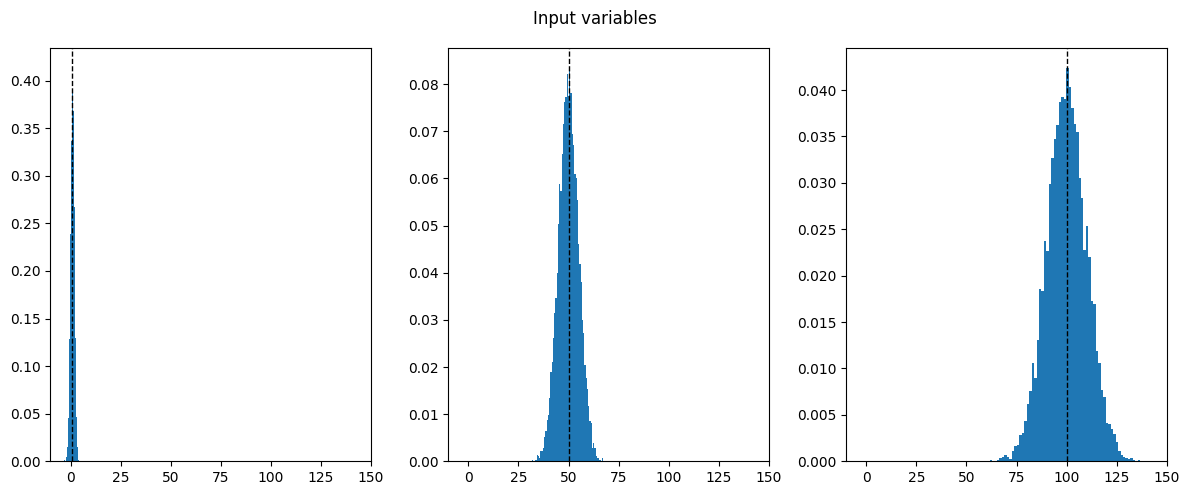

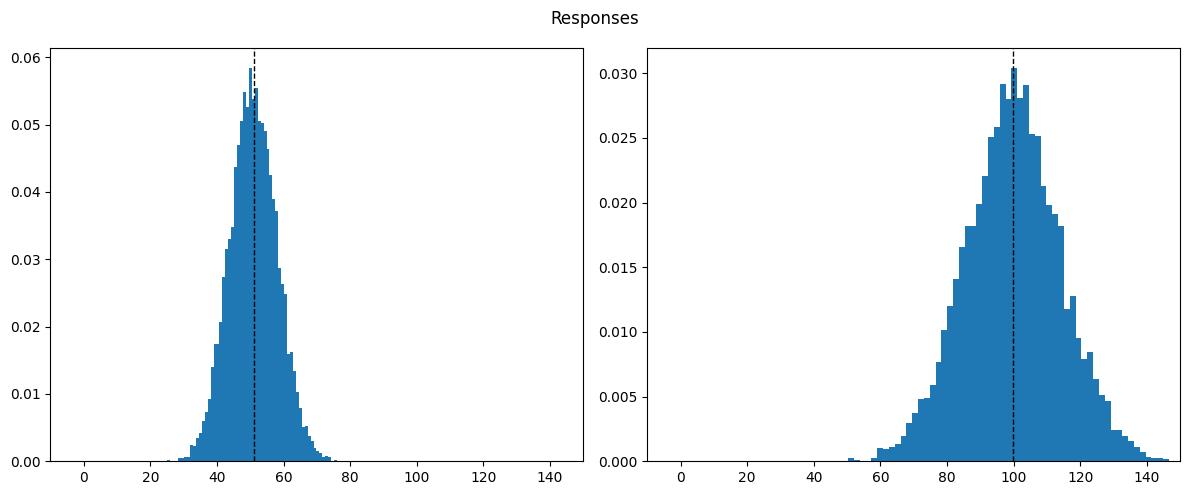

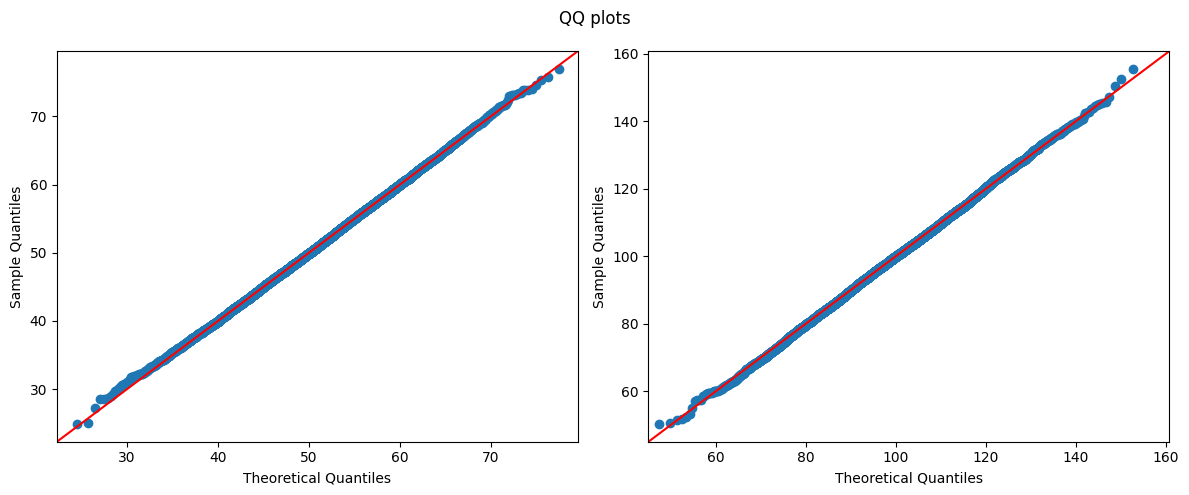

In [203]:
plot_hists(inputs, suptitle='Input variables')
plot_hists(outputs, suptitle='Responses')
normed_outputs = [(outputs[0]-output0_mu)/output0_std, (outputs[1]-output1_mu)/output1_std]
plot_qq(outputs, expected_params=zip(expected_output_mus, expected_output_sigmas), suptitle='QQ plots')